<a href="https://colab.research.google.com/github/RishikeshMVIT/EPICS/blob/main/ml/notebooks/LungDiseaseClassificationFromXRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 25.6 MB/s eta 0:00:00



# Required libraries import

In [ ]:
import mahotas as mh
import seaborn as sns
from matplotlib import pyplot as plt
from glob import glob
import os
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [ ]:
pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00


In [ ]:
import skillsnetwork

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-machine-learning-classification/LargeData/Covid19-dataset.zip", overwrite=True)
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-machine-learning-classification/NN.zip", overwrite=True)

  0%|          | 0/672 [00:00<?, ?it/s]

Saved to '.'


  0%|          | 0/4 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
IMM_SIZE = 224

In [ ]:
def get_data(folder):

    class_names = [f for f in os.listdir(folder) if not f.startswith('.')] # ctreate a list of SubFolders
    data = []
    # class_names = ['Covid', 'Normal', 'Viral Pneumonia']
    print(class_names)
    for t, f in enumerate(class_names):
        images = glob(folder + "/" + f + "/*") # create a list of files
        print("Downloading: ", f)
        fig = plt.figure(figsize = (50,50))
        for im_n, im in enumerate(images):
            plt.gray() # set grey colormap of images
            image = mh.imread(im)
            if len(image.shape) > 2:
                image = mh.resize_to(image, [IMM_SIZE, IMM_SIZE, image.shape[2]]) # resize of RGB and png images
            else:
                image = mh.resize_to(image, [IMM_SIZE, IMM_SIZE]) # resize of grey images
            if len(image.shape) > 2:
                image = mh.colors.rgb2grey(image[:,:,:3], dtype = np.uint8)  # change of colormap of images alpha chanel delete
            plt.subplot(int(len(images)/5)+1,5,im_n+1) # create a table of images
            plt.imshow(image)
            data.append([image, f])
        plt.show()

    return np.array(data)

In [ ]:
d = "Covid19-dataset/train"
train = get_data(d)

d = "Covid19-dataset/test"
val = get_data(d)

In [ ]:
print("Train shape", train.shape) # Size of the training DataSet
print("Test shape", val.shape) # Size of the test DataSet
print("Image size", train[0][0].shape) # Size of image

Train shape (251, 2)
Test shape (66, 2)
Image size (224, 224)


# Data Visualization

<Axes: ylabel='count'>

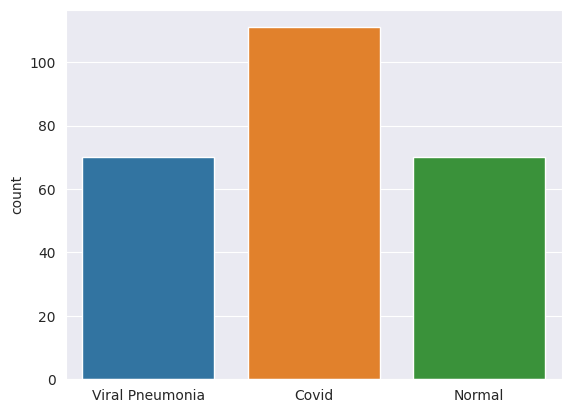

In [ ]:
l = []
for i in train:
    l.append(i[1])
sns.set_style('darkgrid')
sns.countplot(x=l)

Text(0.5, 1.0, 'Viral Pneumonia')

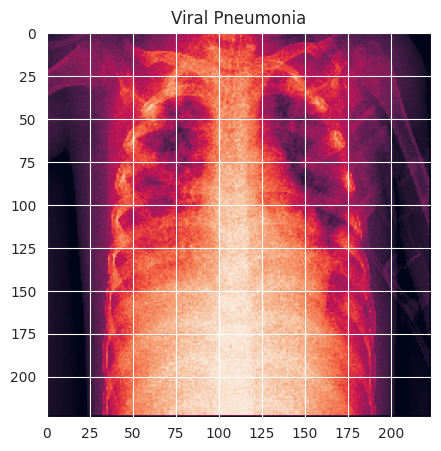

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[np.where(train[:,1] == 'Viral Pneumonia')[0][0]][0])
plt.title('Viral Pneumonia')

Text(0.5, 1.0, 'Covid')

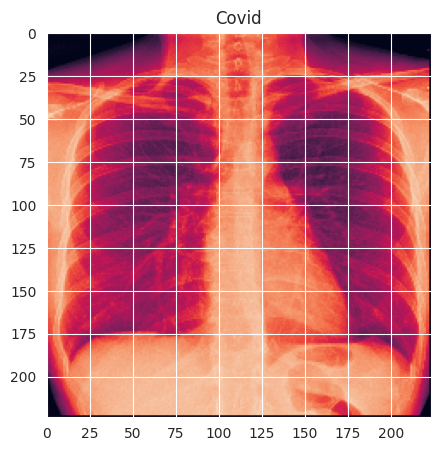

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[np.where(train[:,1] == 'Covid')[0][0]][0])
plt.title('Covid')

In [ ]:
def create_features(data):
    features = []
    labels = []
    for image, label in data:
        features.append(mh.features.haralick(image).ravel())
        labels.append(label)
    features = np.array(features)
    labels = np.array(labels)
    return (features, labels)

In [ ]:
features_train, labels_train = create_features(train)
features_test, labels_test = create_features(val)

In [ ]:
clf = Pipeline([('preproc', StandardScaler()), ('classifier', LogisticRegression())])
clf.fit(features_train, labels_train)
scores_train = clf.score(features_train, labels_train)
scores_test = clf.score(features_test, labels_test)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))
plt.show()

Training DataSet accuracy:  89.6% Test DataSet accuracy:  84.8%


In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
scores_train = []
scores_test = []
for name, clf in zip(names, classifiers):
    print("Fitting:", name)
    clf = Pipeline([('preproc', StandardScaler()), ('classifier', clf)])
    clf.fit(features_train, labels_train)
    score_train = clf.score(features_train, labels_train)
    score_test = clf.score(features_test, labels_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

Fitting: Logistic Regression
Fitting: Nearest Neighbors
Fitting: Linear SVM
Fitting: RBF SVM
Fitting: Gaussian Process
Fitting: Decision Tree
Fitting: Random Forest
Fitting: Neural Net
Fitting: AdaBoost
Fitting: Naive Bayes
Fitting: QDA


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
res = pd.DataFrame(index = names)
res['scores_train'] = scores_train
res['scores_test'] = scores_test
res.columns = ['Test','Train']
res.index.name = "Classifier accuracy"
pd.options.display.float_format = '{:,.2f}'.format
print(res)

                     Test  Train
Classifier accuracy             
Logistic Regression  0.90   0.85
Nearest Neighbors    0.87   0.70
Linear SVM           0.79   0.71
RBF SVM              1.00   0.48
Gaussian Process     0.79   0.67
Decision Tree        0.90   0.64
Random Forest        0.85   0.59
Neural Net           0.94   0.82
AdaBoost             0.86   0.58
Naive Bayes          0.67   0.59
QDA                  1.00   0.56


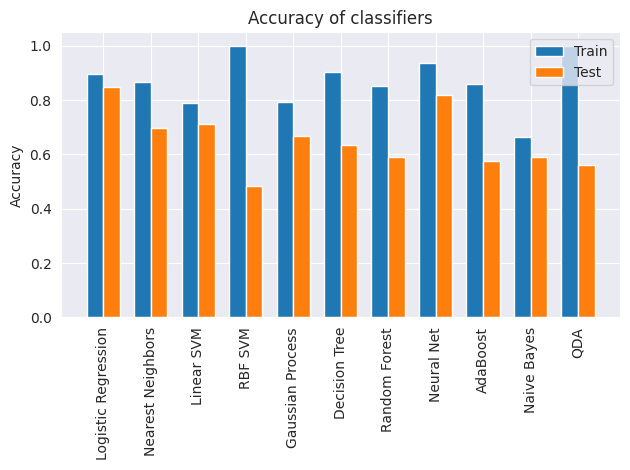

In [ ]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_train, width, label='Train')
rects2 = ax.bar(x + width/2, scores_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of classifiers')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(names)
ax.legend()

fig.tight_layout()

plt.show()

# Building and fitting Convolutional Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

# Reshaping input images
x_train = x_train.reshape(-1, IMM_SIZE, IMM_SIZE, 1)
x_val = x_val.reshape(-1, IMM_SIZE, IMM_SIZE, 1)

# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(y_train)):
    lab[l] = i


y_train = np.array([lab[l] for l in y_train])
y_val = np.array([lab[l] for l in y_val])

In [ ]:
print("Shape of the input DataSet:", x_train.shape)
print("Shape of the output DataSet:", y_train.shape)
print("Dictionary of classes:", lab)

Shape of the input DataSet: (251, 224, 224, 1)
Shape of the output DataSet: (251,)
Dictionary of classes: {'Viral Pneumonia': 0, 'Covid': 1, 'Normal': 2}


# Data augmentation on the training data

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Model defining

In [ ]:
model = Sequential()
model.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(IMM_SIZE,IMM_SIZE,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 1, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 1, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      1056      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        2112      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
fitting = False
fitting_save = False
epochs = 200

import pickle

if fitting:
    history = model.fit(x_train,y_train,epochs = epochs , validation_data = (x_val, y_val), shuffle = True)
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("model.h5")
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
        with open('lab.pickle', 'wb') as f:
            pickle.dump(lab, f)
# load model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into a new model
model.load_weights("model.h5")
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Loaded model from disk


# Results evaluation

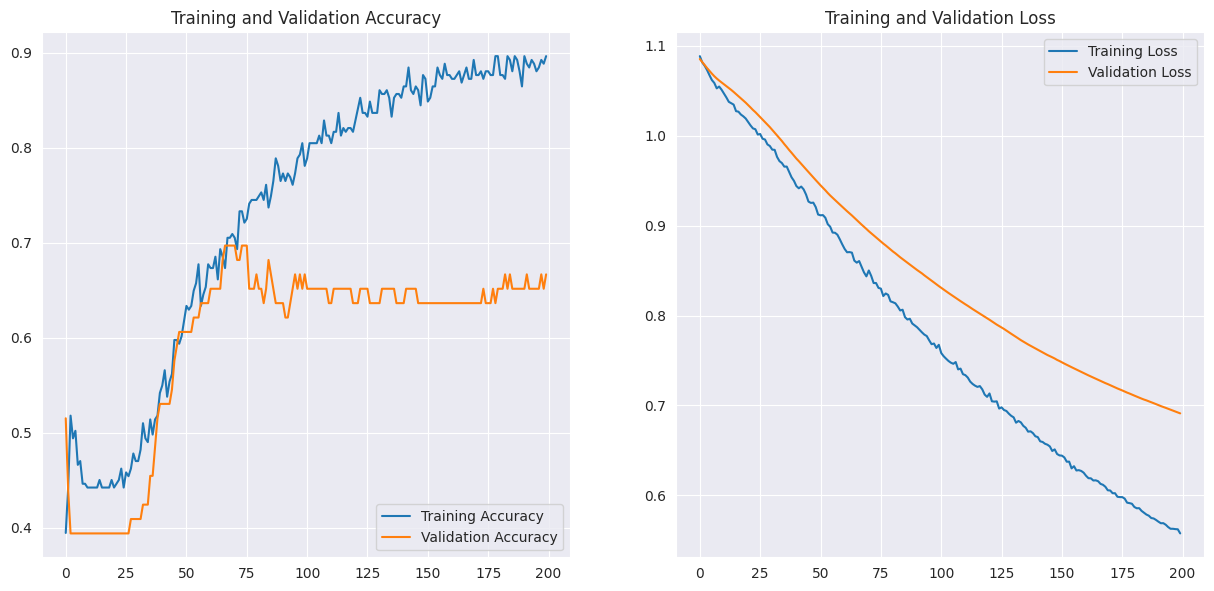

In [ ]:
acc = acc[:len(epochs_range)]
val_acc = val_acc[:len(epochs_range)]
loss = loss[:len(epochs_range)]
val_loss = val_loss[:len(epochs_range)]

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Classification report
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = lab.keys()))

# Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_val, predictions))
cm.index = ["Predicted " + s for s in lab.keys()]
cm.columns = ["True  " + s for s in lab.keys()]
print(cm)

sns.heatmap(confusion_matrix(y_val, predictions), annot=True,
            xticklabels = list(lab.keys()), yticklabels = list(lab.keys()))
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.show()

AttributeError: ignored

In [ ]:
# Accuracy
z = model.predict_classes(x_train) == y_train
scores_train = sum(z+0)/len(z)
z = model.predict_classes(x_val) == y_val
scores_test = sum(z+0)/len(z)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))

AttributeError: ignored

In [ ]:
def diagnosis(file):
    # Download image
    ##YOUR CODE GOES HERE##

    # Prepare image to classification
    ##YOUR CODE GOES HERE##

    # Show image
    ##YOUR CODE GOES HERE##


    # Load model
    ##YOUR CODE GOES HERE##


    # Normalize the data
    ##YOUR CODE GOES HERE##


    # Reshape input images
    ##YOUR CODE GOES HERE##


    # Predict the diagnosis
    ##YOUR CODE GOES HERE##


    # Find the name of the diagnosis
    ##YOUR CODE GOES HERE##


    return diag

In [ ]:
print ("Diagnosis is:", diagnosis("Covid19-dataset/test/Covid/0120.jpg"))
print ("Diagnosis is:", diagnosis("Covid19-dataset/test/Normal/0105.jpeg"))
print ("Diagnosis is:", diagnosis("Covid19-dataset/test/Viral Pneumonia/0111.jpeg"))